In [ ]:
pip install geopandas shapely rtree

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached Rtree-1.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
     |████████████████████████████████| 16.7 MB 345 kB/s 
  Using cached pyproj-3.2.1-cp37-cp37m-manylinux2010_x86_64.whl (6.3 MB)


In [ ]:
import pandas as pd  # provides interface for interacting with tabular data
import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
import rtree  # supports geospatial join
from google.colab import drive 
drive.mount('/content/drive')
data = "drive/MyDrive/Colab Notebooks/project/data/NYS_Civil_Boundaries.shp/Counties.shp"
directory = "drive/MyDrive/Colab Notebooks/project/data/NYS_Civil_Boundaries.shp/"
counties = gpd.read_file(data)
counties = counties.to_crs(epsg=4326)

Mounted at /content/drive


In [ ]:
counties

,NAME,ABBREV,GNIS_ID,FIPS_CODE,SWIS,NYSP_ZONE,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,NYC,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Albany,ALBA,974099,36001,010000,East,292594,294565,304204,314848,None,None,N,532.791779,2017-11-10,166077.834242,1.379924e+09,"POLYGON ((-73.70733 42.78605, -73.70397 42.783..."
1,Allegany,ALLE,974100,36003,020000,West,50470,49927,48946,46456,None,None,N,1035.209131,2019-04-26,210499.339279,2.681179e+09,"POLYGON ((-78.29218 42.52140, -78.29047 42.521..."
2,Bronx,BRON,974101,36005,600000,Long Island,1203789,1332650,1385108,1472654,None,None,Y,57.472148,2019-10-04,57253.861278,1.488522e+08,"POLYGON ((-73.86567 40.90219, -73.86300 40.901..."
3,Broome,BROO,974102,36007,030000,Central,212160,200536,200600,198683,None,None,N,715.287465,2019-04-26,227933.332021,1.852586e+09,"POLYGON ((-75.86416 42.41554, -75.86379 42.413..."
4,Cattaraugus,CATT,974103,36009,040000,West,84234,83955,80317,77042,None,None,N,1324.309219,2019-04-26,276084.505560,3.429945e+09,"POLYGON ((-79.02148 42.53804, -79.01937 42.537..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Washington,WASH,974155,36115,530000,East,59330,61042,63216,61302,None,None,N,845.855708,2017-11-10,302358.996697,2.190756e+09,"POLYGON ((-73.37718 43.79995, -73.37690 43.799..."
58,Wayne,WAYN,974156,36117,540000,Central,89123,93765,93772,91283,None,None,N,1395.598959,2018-02-08,254972.219986,3.614585e+09,"POLYGON ((-76.74696 43.69594, -76.72214 43.343..."
59,Westchester,WEST,974157,36119,550000,East,874866,923459,949113,1004457,None,None,N,499.972897,2019-10-04,182997.677827,1.294924e+09,"POLYGON ((-73.54795 41.31920, -73.54819 41.316..."
60,Wyoming,WYOM,974158,36121,560000,West,42507,43424,42155,40531,None,None,N,596.822633,2018-09-20,176096.925232,1.545764e+09,"POLYGON ((-78.36506 42.86886, -78.36497 42.868..."


In [ ]:
ny = counties[counties.loc[:, "NAME"]=="New York"].loc[:, "geometry"]
type(ny)

geopandas.geoseries.GeoSeries

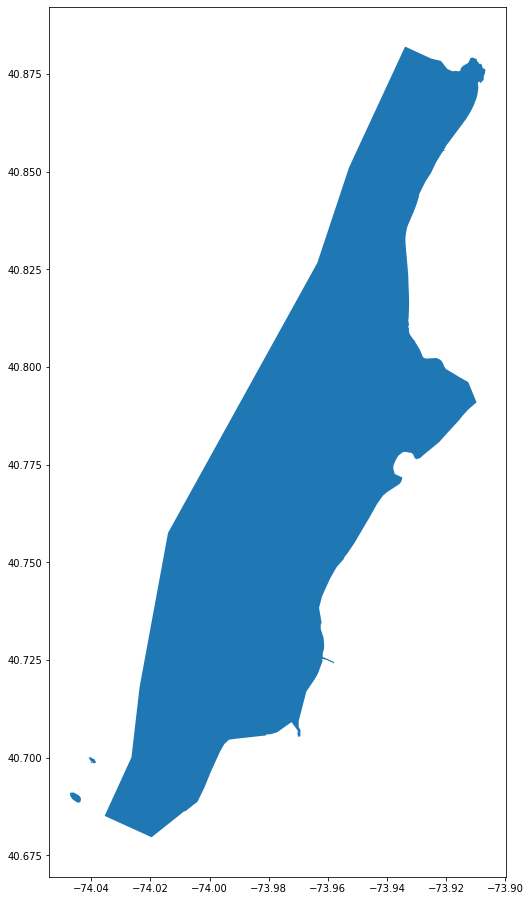

In [ ]:
ny.plot(figsize=(24,16));

In [ ]:
img_dir = "drive/MyDrive/Colab Notebooks/project//data/images/"
data_dir = "drive/MyDrive/Colab Notebooks/project//data/"
from scipy.io import loadmat
coordinates = loadmat(data_dir + "GPS_Long_Lat_Compass.mat")["GPS_Compass"] # Coordinates. Each coordinate corresponds to 6 pictures


In [ ]:
type(coordinates[0][0])

numpy.float64

In [ ]:
coordinates = [Point(c[1], c[0]) for c in coordinates]

In [ ]:
coordinates_gpd = gpd.GeoDataFrame(geometry=coordinates)

In [ ]:
coordinates_gpd

,geometry
0,POINT (-80.00000 40.44031)
1,POINT (-80.00680 40.44027)
2,POINT (-80.00670 40.44023)
3,POINT (-80.00660 40.44019)
4,POINT (-80.00650 40.44015)
...,...
10338,POINT (-74.00172 40.73055)
10339,POINT (-74.00160 40.73075)
10340,POINT (-74.00154 40.73085)
10341,POINT (-74.00149 40.73093)


In [ ]:
!pip install reverse_geocoder

     |████████████████████████████████| 2.2 MB 14.5 MB/s 
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268088 sha256=43bf2878880292a58e24bb1e92be8002d6bd7d0a8c17634b380069d392148638
  Stored in directory: /root/.cache/pip/wheels/34/6e/70/5423639428a2cac8ea7eb467214a4254b549b381f306a9c790
Successfully built reverse-geocoder


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import reverse_geocoder
from os import listdir
from os.path import isfile, join

In [ ]:
### Returns an array of True/False if the coordinate is in a given state
### coordinates: An array of coordinates
### state: Full name of the state. ex= "New York"
def get_coordinates_in_state(coordinates, state):
    coords = [(lat,long) for lat,long,ele in coordinates]
    results = reverse_geocoder.search(coords, mode=2)
    state = [x['admin1']==state for x in results]
    return state

In [ ]:
img_dir = "drive/MyDrive/Colab Notebooks/project/data/images/"
data_dir = "drive/MyDrive/Colab Notebooks/project/data/"
img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f))] # Names of all images in the folder
coordinates = loadmat(data_dir + "GPS_Long_Lat_Compass.mat")["GPS_Compass"] # Coordinates. Each coordinate corresponds to 6 pictures
in_ny = get_coordinates_in_state(coordinates=coordinates, state="New York") # All coordinates in NY
in_ny[:5]

Loading formatted geocoded file...


[False, False, False, False, False]

In [ ]:
ny_coords = [coordinates[x] for x in range(len(in_ny)) if in_ny[x]]
coordinates = [Point(c[1], c[0]) for c in ny_coords]

In [ ]:
len(ny_coords)

4731

In [ ]:
ny_coordinates_gpd = gpd.GeoDataFrame(geometry=coordinates)

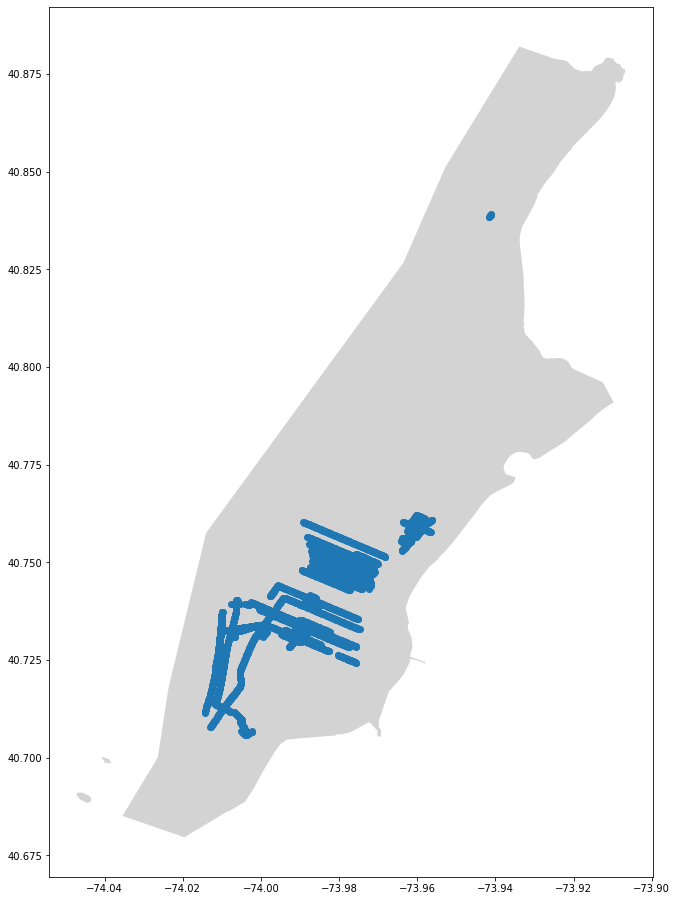

In [ ]:
import matplotlib.pyplot as plt
ax = ny.plot(color='lightgrey',figsize=(16,16))
ny_coordinates_gpd.loc[:,'geometry'].plot(ax=ax)

In [ ]:
bounds = ny.bounds
print(bounds)
list(bounds.values)

         minx       miny       maxx       maxy
30 -74.047207  40.679654 -73.906769  40.882012


[array([-74.0472072 ,  40.67965408, -73.90676928,  40.88201247])]

In [ ]:
import pickle

pickle.dump(ny, open("ny.pkl","wb"))

In [ ]:
!pip install gmaps

     |████████████████████████████████| 1.1 MB 17.3 MB/s 
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076111 sha256=707da95e85ab526b8b91e05eed5570be161f8e2c7a48f8a16a317ab8d01c9466
  Stored in directory: /root/.cache/pip/wheels/3d/1c/cb/c46f4199210e632b28d78d05a00bfdccbf6dfcd3f5b051d6bf
Successfully built gmaps


In [ ]:
import shapely
import gmaps
from shapely.geometry import Point, Polygon, box
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [ ]:
ny_coordinates_gpd

,geometry
0,POINT (-73.97108 40.74847)
1,POINT (-73.97120 40.74852)
2,POINT (-73.97131 40.74857)
3,POINT (-73.97141 40.74861)
4,POINT (-73.97152 40.74866)
...,...
4726,POINT (-74.00172 40.73055)
4727,POINT (-74.00160 40.73075)
4728,POINT (-74.00154 40.73085)
4729,POINT (-74.00149 40.73093)


In [ ]:
# total area for the grid
xmin, ymin, xmax, ymax= ny.total_bounds

# how many cells across and down
n_cells=20
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

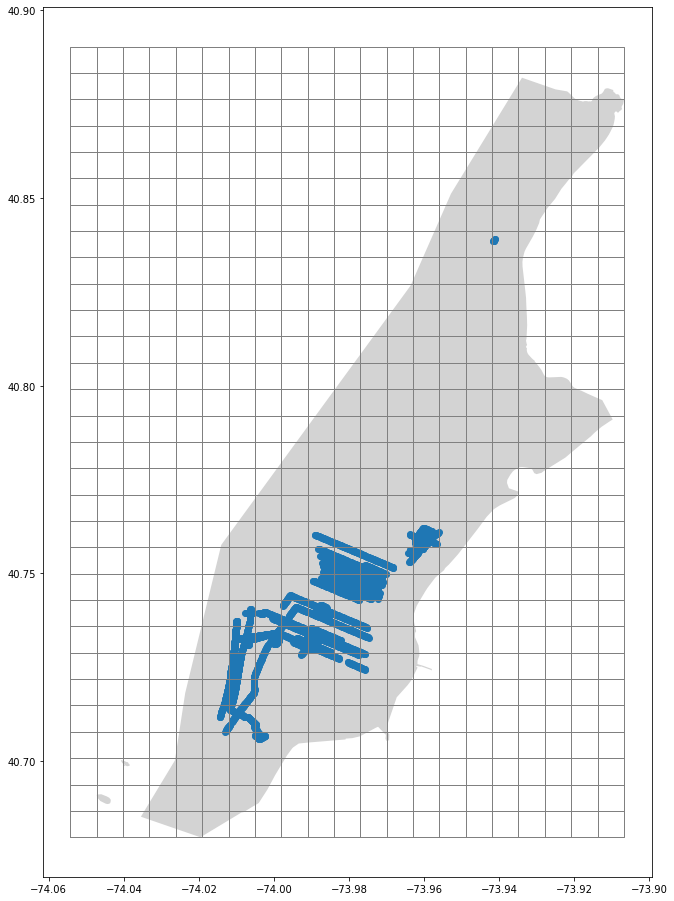

In [ ]:
import matplotlib.pyplot as plt
ax = ny.plot(color='lightgrey',figsize=(16,16))
ny_coordinates_gpd.loc[:,'geometry'].plot(ax=ax)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')

In [ ]:
ny_coordinates_DF = gpd.GeoDataFrame(geometry=ny_coordinates_gpd.loc[:,'geometry'])

In [ ]:
merged = gpd.sjoin(ny_coordinates_DF, cell, how='left', op='within')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: +proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 + ...

  """Entry point for launching an IPython kernel.


In [ ]:
# make a simple count variable that we can sum
merged['n_fires']=1
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell.loc[dissolve.index, 'n_fires'] = dissolve.n_fires.values

(-74.05422909979109,
 -73.89974738013086,
 40.669536155667465,
 40.892130389541855)

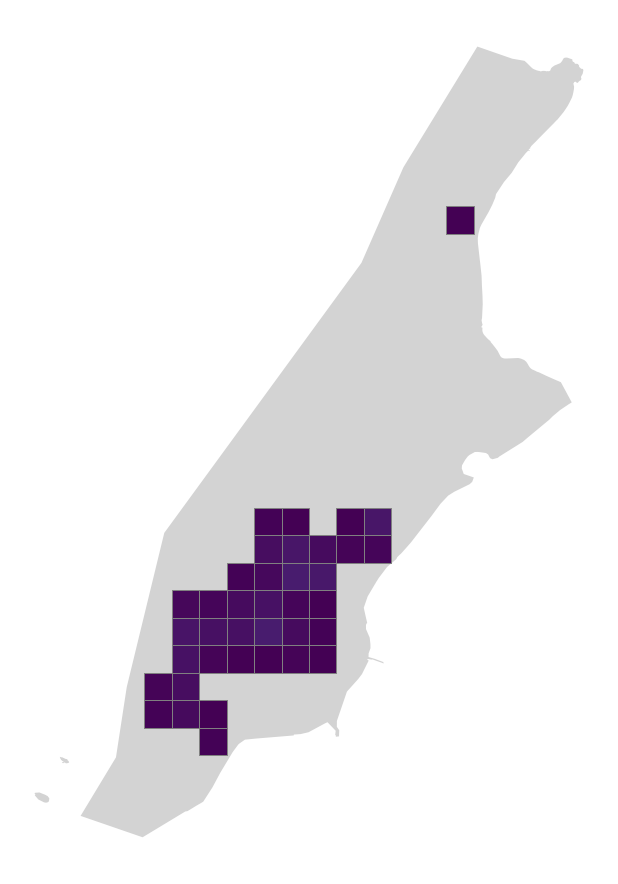

In [ ]:
ax = ny.plot(color='lightgrey',figsize=(16,16))
cell.plot(ax=ax, column='n_fires', figsize=(12, 8), cmap='viridis', vmax=5000, edgecolor="grey")
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(cell.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')

In [ ]:
r_tree = cell.sindex
print(r_tree)

rtree.index.Index(bounds=[-74.05422909979109, 40.67965407538904, -73.90676927647905, 40.8903109658348], size=70)


In [ ]:
classes_and_coordinates = []
for leaf in r_tree.leaves():
    idxs, indices, bbox = leaf
    classes_and_coordinates.append([idxs,indices])
    print(f'-> points in box {idxs}: ',  indices, '\n bounding box: ', bbox, '\n')
print(f"number of leaves: {len(r_tree.leaves())}")

-> points in box 0:  [0, 150, 90, 120, 30, 60, 180, 151, 91, 61, 181, 31, 121, 1, 92, 2, 122, 152, 62, 182, 32, 63, 93, 33, 123, 183, 153, 3, 4, 154, 184, 94, 34, 64, 124, 185, 95, 5, 35, 125, 65, 155, 66, 186, 36, 156, 96, 6, 126, 157, 67, 97, 127, 187, 37, 7, 38, 8, 188, 98, 68, 128, 158, 39, 189, 69, 159, 129, 9, 99] 
 bounding box:  [-74.05422909979109, 40.67965407538904, -74.00507582535374, 40.74987303887096] 

-> points in box 2:  [70, 130, 10, 100, 40, 190, 160, 191, 11, 131, 161, 41, 101, 71, 42, 102, 72, 12, 162, 192, 132, 73, 163, 103, 193, 13, 133, 43, 74, 44, 104, 134, 14, 164, 194, 165, 75, 45, 105, 135, 15, 195, 166, 16, 136, 106, 76, 46, 196, 47, 107, 77, 137, 197, 17, 167, 198, 18, 168, 138, 78, 108, 48, 169, 109, 49, 199, 139, 19, 79] 
 bounding box:  [-74.05422909979109, 40.74987303887096, -74.00507582535374, 40.82009200235288] 

-> points in box 3:  [140, 20, 50, 200, 80, 110, 170, 81, 21, 111, 201, 171, 141, 51, 202, 82, 172, 142, 22, 112, 52, 113, 23, 143, 83, 53, 

In [ ]:
boxes = []
boxes_idx = 0
for c in cell["geometry"]:
    boxes.append([boxes_idx,[]])
    for p in ny_coordinates_gpd.loc[:,'geometry']:
        if c.contains(p):
            boxes[boxes_idx][1].append(p)
    boxes_idx+=1

In [ ]:
print("Grids with coordinates in them: ", len([b for b in boxes if bool(b[1])]))

Grids with coordinates in them:  38


In [ ]:
labels_coordinates = [b for b in boxes if bool(b[1])]

In [ ]:
labels_coordinates[0]

[154,

In [ ]:
data = []
for i in range(len(labels_coordinates)):
    # print(labels_coordinates[i][1])
    for j in range(len(labels_coordinates[i][1])):
        data.append([np.array([labels_coordinates[i][1][j].y,labels_coordinates[i][1][j].x]), labels_coordinates[i][0]])

In [ ]:
data[:40]

[[array([ 40.714682, -74.013433]), 154],
 [array([ 40.714553, -74.013447]), 154],
 [array([ 40.714452, -74.013459]), 154],
 [array([ 40.714314, -74.013486]), 154],
 [array([ 40.714201, -74.013509]), 154],
 [array([ 40.714095, -74.013532]), 154],
 [array([ 40.714006, -74.01355 ]), 154],
 [array([ 40.7139  , -74.013607]), 154],
 [array([ 40.713817, -74.013664]), 154],
 [array([ 40.713719, -74.013732]), 154],
 [array([ 40.713687, -74.013753]), 154],
 [array([ 40.713604, -74.013802]), 154],
 [array([ 40.713496, -74.01385 ]), 154],
 [array([ 40.713393, -74.013891]), 154],
 [array([ 40.7133  , -74.013921]), 154],
 [array([ 40.71319 , -74.013953]), 154],
 [array([ 40.713105, -74.013975]), 154],
 [array([ 40.71302 , -74.013997]), 154],
 [array([ 40.712933, -74.014019]), 154],
 [array([ 40.712844, -74.014042]), 154],
 [array([ 40.712753, -74.014066]), 154],
 [array([ 40.712658, -74.01409 ]), 154],
 [array([ 40.712463, -74.01414 ]), 154],
 [array([ 40.712359, -74.014167]), 154],
 [array([ 40.712

In [ ]:
import pickle
grid_path = "drive/MyDrive/Colab Notebooks/project/work/grid_coordinates.pkl"
with open(grid_path, 'wb') as f:
    pickle.dump(data, f)

In [ ]:
len(cell)

630